# Energy measuring procedure

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from IPython.display import Image
from IPython.core.display import HTML


## Mathematical condition:

- 2 segments p-p+r, q-q+s are intersecting if the cross product of ( p,p+r,q+s) is different than (p,p+r,q),
and the cross product of (q,q+s,p) and (q,q+s,p+r) is also different. We see that we need to generate 6 different vectors
for checking if two segments are intersecting

In [4]:
Image(url="https://i.stack.imgur.com/vD4g5.png")

## Recreation of a fictitious loop:

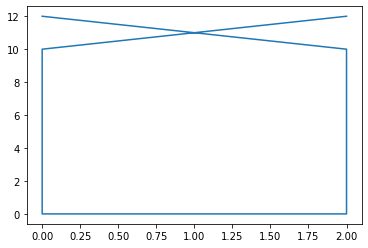

In [5]:
# Simulating hysteretic loop

x1=np.linspace(0.00,2.,10)
x2=np.linspace(2.,2.,20)
x3=np.linspace(2.,0.,15)
x4=np.linspace(0.00,0.00,30)
x5=np.linspace(0.00,2.,20)
x_descending=np.concatenate((x1,x2,x3)) # associated to x coordinates of descending branch
x_ascending=np.concatenate((x4,x5)) # associated to x coordinates of ascending branch

y1=np.linspace(12.,10.,10)
y2=np.linspace(10.,0.,20)
y3=np.linspace(0.,0.,15)
y4=np.linspace(0.,10.,30)
y5=np.linspace(10.,12.,20)
y_descending=np.concatenate((y1,y2,y3))
y_ascending=np.concatenate((y4,y5))

plt.plot(np.concatenate((x_descending,x_ascending)),np.concatenate((y_descending,y_ascending)))

We select each individual segment of the descending branch, starting from the left side, and apply the described mathematical
condition with each of the segments of the ascending branch. Once that the intersection is found, break the loop.
Inefficient.

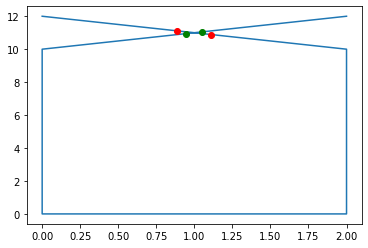

20.504018330426454


In [7]:
intersect=0
for i in range(len(x_descending)-1): #index i for i-th segment of descending branch
    vector1 = np.array([x_descending[i+1] - x_descending[i], y_descending[i+1] - y_descending[i]])
    #1st of the 6 needed vectors for mathematical condition, p-p+r from example
    for j in range(1,len(x_ascending)):
        vector2 = np.array([x_ascending[len(x_ascending)-j] - x_descending[i+1], y_ascending[len(y_ascending)-j] - y_descending[i+1]])
        vector3 = np.array([x_ascending[len(x_ascending)-j-1] - x_descending[i+1], y_ascending[len(y_ascending)-j-1] - y_descending[i+1]])
        vector4 = np.array([x_ascending[len(x_ascending)-j-1] - x_ascending[len(x_ascending)-j], y_ascending[len(y_ascending)-j-1] - y_ascending[len(y_ascending)-j]])
        # q-q+s vector from example
        vector5 = np.array([x_descending[i] - x_ascending[len(x_ascending)-j-1] , y_descending[i] - y_ascending[len(y_ascending)-j-1]])
        vector6 = np.array([x_descending[i+1] - x_ascending[len(x_ascending)-j-1], y_descending[i+1] - y_ascending[len(y_ascending)-j-1]])
        d1 = np.cross(vector1,vector2)
        d2 = np.cross(vector1,vector3)
        d3 = np.cross(vector4,vector5)
        d4 = np.cross(vector4,vector6)
        # Mathematical condition
        if (np.sign(d1) != np.sign(d2)) & (np.sign(d3) != np.sign(d4)):
            intersect=1
            break
    if intersect == 1:
        break
# Plotting loop
plt.plot(np.concatenate((x_descending,x_ascending)),np.concatenate((y_descending,y_ascending)))
# Plotting intersection segment from descending branch
plt.plot(x_descending[i],y_descending[i],'ro')
plt.plot(x_descending[i+1],y_descending[i+1],'ro')
# Plotting intersection segment from ascending branch
plt.plot(x_ascending[len(x_ascending)-j],y_ascending[len(x_ascending)-j],'go')
plt.plot(x_ascending[len(x_ascending)-j-1],y_ascending[len(x_ascending)-j-1],'go')
plt.show()

In general, the actual intersection point does not exist, so we have to calculate it

20.504018330426454


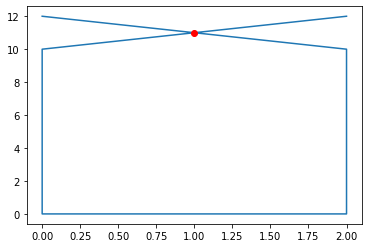

In [8]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

A = (x_descending[i],y_descending[i])
B = (x_descending[i+1],y_descending[i+1])
C = (x_ascending[len(x_ascending)-j],y_ascending[len(x_ascending)-j])
D = (x_ascending[len(x_ascending)-j-1],y_ascending[len(x_ascending)-j-1])

inter_x, inter_y = line_intersection((A, B), (C, D))

# Plotting loop
plt.plot(np.concatenate((x_descending,x_ascending)),np.concatenate((y_descending,y_ascending)))

# Plotting intersection

plt.plot(inter_x, inter_y, 'ro')

In [15]:
#Creating array containing just the loop
x=np.concatenate((np.array([inter_x]), x_descending[i+1:],x_ascending[:len(x_ascending)-j-1], np.array([inter_x])))
y=np.concatenate((np.array([inter_y]), y_descending[i+1:],y_ascending[:len(x_ascending)-j-1], np.array([inter_y])))

int=scipy.integrate.cumtrapz(y, x)
print(int[-1])


(1,)
21.0


## Implementation in real example

In [8]:
force_array = np.load('C:\\Users\\marag\\Desktop\\energy_test\\NPY\\BE_C80_24_16_2DS_23033_Kraft.npy')*-1
force_max_indices = np.load('C:\\Users\\marag\\Desktop\\energy_test\\NPY\\force_max_indices.npy')
force_min_indices = np.load('C:\\Users\\marag\\Desktop\\energy_test\\NPY\\force_min_indices.npy')

disp_array = np.abs(np.load('C:\\Users\\marag\\Desktop\\energy_test\\NPY\\BE_C80_24_16_2DS_23033_Weg.npy'))
# array_rest_maxima = np.load('C:\\Users\\maguilar\\Energy_dissipation\\array_rest_maxima.npy')
# array_rest_minima = np.load('C:\\Users\\maguilar\\Energy_dissipation\\array_rest_minima.npy')

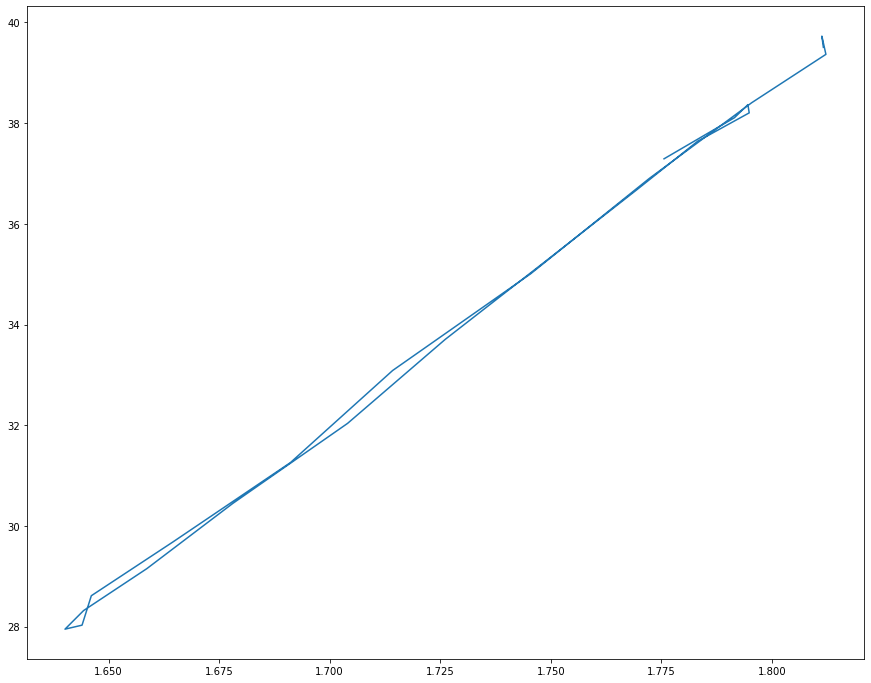

In [17]:
f, (ax) = plt.subplots(1, 1, figsize=(15, 12))
ax.plot(disp_array[7936:7960],force_array[7936:7960])
# plt.plot(disp_array[force_max_indices],force_array[force_max_indices],'bo')
# plt.plot(disp_array[force_min_indices],force_array[force_min_indices],'go')


# for i in range(len(force_min_indices) - 1):
#     x_descending = disp_array[force_max_indices[i]:force_min_indices[i]]
#     x_ascending = disp_array[force_min_indices[i]:force_max_indices[i + 1]]
#     y_descending = force_array[force_max_indices[i]:force_min_indices[i]]
#     y_ascending = force_array[force_min_indices[i]:force_max_indices[i + 1]]
#     intersect=0
#     for i in range(len(x_descending)-1):
#         vector1 = np.array([x_descending[i+1] - x_descending[i], y_descending[i+1] - y_descending[i]])
#         for j in range(1,len(x_ascending)):
#             vector2 = np.array([x_ascending[len(x_ascending)-j] - x_descending[i+1], y_ascending[len(y_ascending)-j] - y_descending[i+1]])
#             vector3 = np.array([x_ascending[len(x_ascending)-j-1] - x_descending[i+1], y_ascending[len(y_ascending)-j-1] - y_descending[i+1]])
#             vector4 = np.array([x_ascending[len(x_ascending)-j-1] - x_ascending[len(x_ascending)-j], y_ascending[len(y_ascending)-j-1] - y_ascending[len(y_ascending)-j]])
#             vector5 = np.array([x_descending[i] - x_ascending[len(x_ascending)-j-1] , y_descending[i] - y_ascending[len(y_ascending)-j-1]])
#             vector6 = np.array([x_descending[i+1] - x_ascending[len(x_ascending)-j-1], y_descending[i+1] - y_ascending[len(y_ascending)-j-1]])
#             d1 = np.cross(vector1,vector2)
#             d2 = np.cross(vector1,vector3)
#             d3 = np.cross(vector4,vector5)
#             d4 = np.cross(vector4,vector6)
#             if (np.sign(d1) != np.sign(d2)) & (np.sign(d3) != np.sign(d4)):
#                 intersect=1
#                 break
#         if intersect == 1:
#             break
#     plt.plot(x_descending[i],y_descending[i],'ro')
#     plt.plot(x_descending[i+1],y_descending[i+1],'ro')
#     plt.plot(x_ascending[len(x_ascending)-j],y_ascending[len(x_ascending)-j],'go')
#     plt.plot(x_ascending[len(x_ascending)-j-1],y_ascending[len(x_ascending)-j-1],'go')
plt.show()